In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.figure_factory as ff
import seaborn as sns

dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("Number of entries = " + str(len(dataset)))
dataset.head()

Number of entries = 299


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
columns = list(dataset.columns)
print(*columns, sep='\n')

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

algo_accuracy_record = []  # each element is list of format - ['algo_name', algo_max_accuracy]

In [7]:
#from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils

init = keras.initializers.RandomNormal(seed=1)
act = keras.layers.LeakyReLU(alpha=0.3)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 298, shuffle = True, random_state = 2)

len(x_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


298

In [8]:
x_train

array([[6.500e+01, 0.000e+00, 1.180e+02, ..., 1.000e+00, 1.000e+00,
        2.000e+02],
       [5.800e+01, 1.000e+00, 5.700e+01, ..., 1.000e+00, 1.000e+00,
        2.050e+02],
       [6.000e+01, 1.000e+00, 3.150e+02, ..., 1.000e+00, 1.000e+00,
        1.000e+01],
       ...,
       [8.500e+01, 0.000e+00, 5.882e+03, ..., 1.000e+00, 1.000e+00,
        7.200e+01],
       [8.200e+01, 1.000e+00, 3.790e+02, ..., 1.000e+00, 0.000e+00,
        1.300e+01],
       [6.500e+01, 0.000e+00, 5.820e+02, ..., 0.000e+00, 0.000e+00,
        1.400e+02]])

In [14]:
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x = sc.fit_transform(x)
#y = sc.fit_transform(y)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
cvscores = []
history_info = []
for train_index, test_index in kfold.split(x, y):
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = init, activation = act, input_dim = 12))
    model.add(Dropout(1/3))
    model.add(Dense(units = 12, kernel_initializer = init, activation = act))
    model.add(Dropout(1/3))
    model.add(Dense(units = 8, kernel_initializer = init, activation = act))
    model.add(Dropout(0.5))
    model.add(Dense(units = 8, kernel_initializer = init, activation = 'tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 4, kernel_initializer = init, activation = 'tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 4, kernel_initializer = init, activation = 'tanh'))
    model.add(Dense(units = 1, kernel_initializer = init, activation = 'sigmoid'))
    model.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
    callbacks_list = [EarlyStopping(monitor='val_loss', patience=3)]
    history=model.fit(x[train_index], y[train_index], batch_size = len(x[train_index]), epochs = 1000, callbacks=callbacks_list)
    tuple_1=tuple(history.history['acc'])
    history_info.append(tuple_1)
    nn_pred = model.predict(x[test_index])
    for i in range(len(nn_pred)):
        if(nn_pred[i] > 0.5):
            nn_pred[i] = 1
        else:
            nn_pred[i] = 0
    nn_acc = accuracy_score(y[test_index], nn_pred)
    cvscores.append(nn_acc)
cvscores       

Epoch 1/1000
268/268 [==============================] - 1s 2ms/sample - loss: 0.6931 - acc: 0.5672
Epoch 2/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6929 - acc: 0.6791
Epoch 3/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6927 - acc: 0.6791
Epoch 4/1000
268/268 [==============================] - 0s 15us/sample - loss: 0.6925 - acc: 0.6791
Epoch 5/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6923 - acc: 0.6791
Epoch 6/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6921 - acc: 0.6791
Epoch 7/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6919 - acc: 0.6791
Epoch 8/1000
268/268 [==============================] - 0s 22us/sample - loss: 0.6917 - acc: 0.6791
Epoch 9/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6915 - acc: 0.6791
Epoch 10/1000
268/268 [==============================] - 0s 22us/sample - loss: 0.6913 - acc: 0.6791


D:\anaconda\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 21/1000
268/268 [==============================] - 0s 21us/sample - loss: 0.6890 - acc: 0.6791
Epoch 22/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6888 - acc: 0.6791
Epoch 23/1000
268/268 [==============================] - 0s 22us/sample - loss: 0.6886 - acc: 0.6791
Epoch 24/1000
268/268 [==============================] - 0s 22us/sample - loss: 0.6884 - acc: 0.6791
Epoch 25/1000
268/268 [==============================] - 0s 15us/sample - loss: 0.6882 - acc: 0.6791
Epoch 26/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6879 - acc: 0.6791
Epoch 27/1000
268/268 [==============================] - 0s 15us/sample - loss: 0.6877 - acc: 0.6791
Epoch 28/1000
268/268 [==============================] - 0s 22us/sample - loss: 0.6875 - acc: 0.6791
Epoch 29/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6873 - acc: 0.6791
Epoch 30/1000
268/268 [==============================] - 0s 19us/sample - loss: 0.6871 - ac

[0.8709677419354839,
 0.7419354838709677,
 0.8064516129032258,
 0.8333333333333334,
 0.7,
 0.9,
 0.8275862068965517,
 0.7586206896551724,
 0.6896551724137931,
 0.8620689655172413]

<function matplotlib.pyplot.show(*args, **kw)>

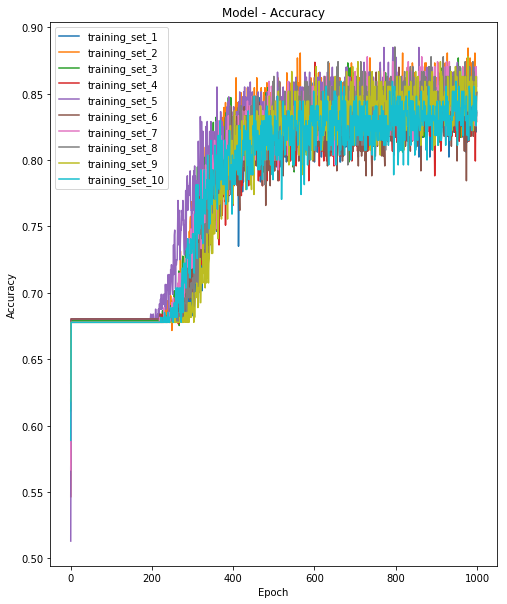

In [20]:
plt.figure(figsize=(8,10))
#plt_gca().set_color_circle(['red','green','blue','yellow','black','gray','hotpink','orange','silver','navy'])
for i in range(10):
    plt.plot(history_info[i])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['training_set_1','training_set_2','training_set_3','training_set_4','training_set_5','training_set_6','training_set_7','training_set_8','training_set_9','training_set_10'])
plt.show